## HR Attrition Rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Data Set

In [2]:
hr = pd.read_csv(r"C:\Users\Kushal Kulkarni\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
hr.shape

(1470, 35)

Observations about the data set;

1) There are total 35 number of columns in the data set which means there are total 34 no. of independent attributes and one is our target vairable.

2) There are 1470 no. of rows in the set which means there are 1470 instances of our attributes in the set.

3) Our Target variable would be Column 'Attrition' in this case and we will predict the same.

4) This is going to be a classification project where we need to predict whether the  Attrition of Employee is There or Not.

In [5]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
hr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
hr.sample(25)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
968,36,No,Travel_Frequently,607,Sales,7,3,Marketing,1,1362,...,4,80,1,17,2,2,15,7,6,13
1185,43,No,Travel_Rarely,1291,Research & Development,15,2,Life Sciences,1,1666,...,1,80,1,14,3,3,14,10,6,11
1124,39,No,Travel_Rarely,1462,Sales,6,3,Medical,1,1588,...,1,80,1,11,3,3,7,6,7,6
345,23,No,Travel_Rarely,1309,Research & Development,26,1,Life Sciences,1,465,...,3,80,2,4,2,2,4,2,0,2
1084,34,No,Travel_Rarely,971,Sales,1,3,Technical Degree,1,1535,...,4,80,0,10,3,3,10,9,8,6
789,44,Yes,Travel_Rarely,1376,Human Resources,1,2,Medical,1,1098,...,4,80,1,24,1,3,20,6,3,6
579,34,No,Travel_Rarely,121,Research & Development,2,4,Medical,1,804,...,3,80,0,6,3,3,6,5,1,3
574,34,No,Travel_Rarely,182,Research & Development,1,4,Life Sciences,1,797,...,3,80,0,10,2,3,4,2,1,3
651,47,No,Travel_Rarely,249,Sales,2,2,Marketing,1,903,...,1,80,1,8,2,3,7,6,7,7
608,55,Yes,Travel_Rarely,436,Sales,2,1,Medical,1,842,...,3,80,0,12,3,2,9,7,7,3


In [8]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observations:
    
1) From above table is can be seen that there is no null value in any of the column which means our data is complete and a good data set.

2) The data set has 2 data types int and object.

3) We will be using the PCA method to use dimentionality of data set as there are 35 columns in the set.

In [9]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations:
    
1) From above it is seen that total 26 columns are there in numeric format.

2) The standard deviation for most of the columns is a bit on high side which suggests the outliers in columns.

3) The difference between the mean and the median for all the columns is not much difference which suggests the less skewness in the data.

4) There is noticable difference between the 75% and the maximum value of the columns which also suggests the outliers in the columns.

5) We will first try remove the outliers from the set and then check the skewness in the data.

In [10]:
hr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

We will check for skewness of continous numerical data and then try to remove the skewness if needed.

In [11]:
hr.skew()

C:\Users\Kushal Kulkarni\AppData\Local\Temp\ipykernel_4284\810223311.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  hr.skew()


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

<AxesSubplot:ylabel='Frequency'>

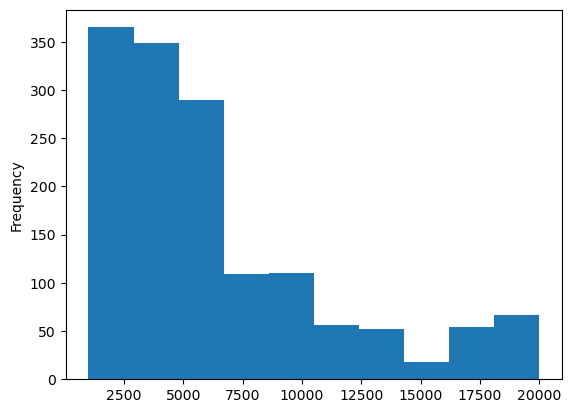

In [12]:
hr['MonthlyIncome'].plot.hist()

A skewness can be seen in the above histogram. We will try to remove it.

In [13]:
hr['MonthlyIncome'] = np.sqrt(hr['MonthlyIncome'])

In [14]:
hr['MonthlyIncome'].skew()

0.8619596187321055

<AxesSubplot:ylabel='Frequency'>

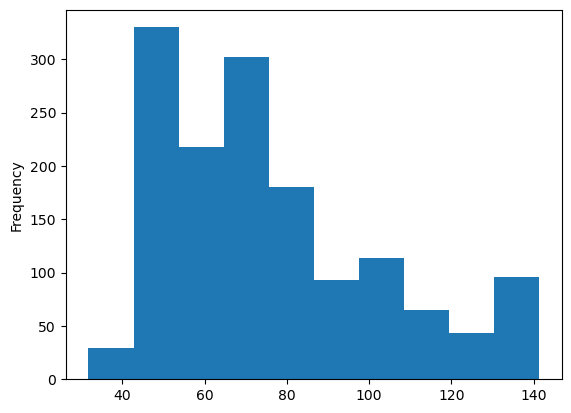

In [15]:
hr['MonthlyIncome'].plot.hist()

So as this was a continous data and not categorical we have tried to normalize the data and remove the skewness.

Except the above columns rest all the columns seems to have skewness value in the limit or are having the categorical data. We will also check the graphical analysis through distrubution plot. But before that we will be converting our string data into float.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
oe = OrdinalEncoder()

for i in hr.columns:
    if hr[i].dtypes == 'object':
        hr[i] = oe.fit_transform(hr[i].values.reshape(-1,1))

In [18]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,1,2065,...,4,80,0,17,3,2,9,6,0,8


So we have changed the dtype of our String columns and now all the columns in numerical columns and now we will check the distribution of our columns through distplot.

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


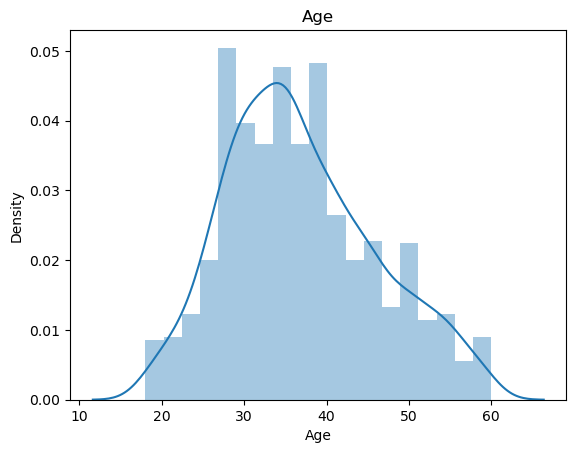

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


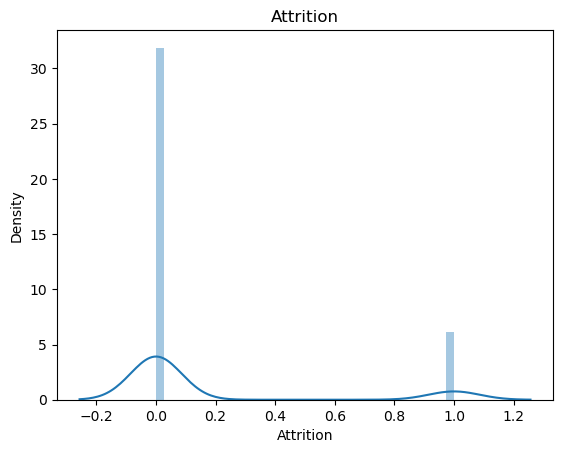

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


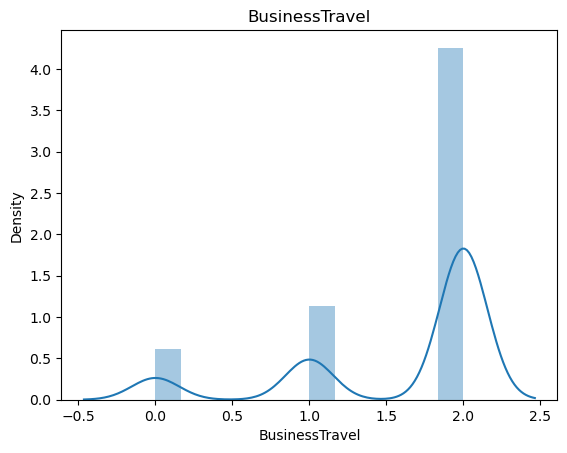

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


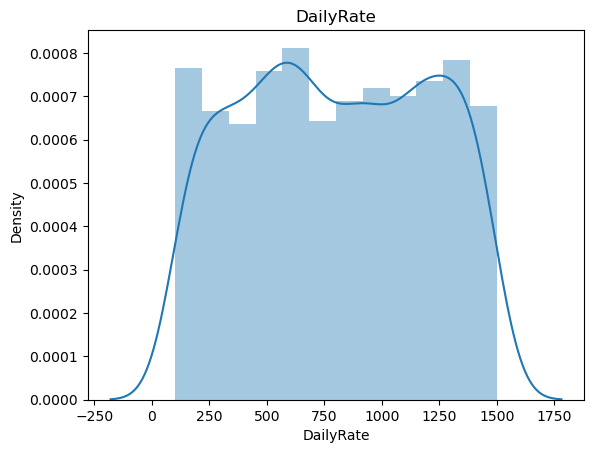

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


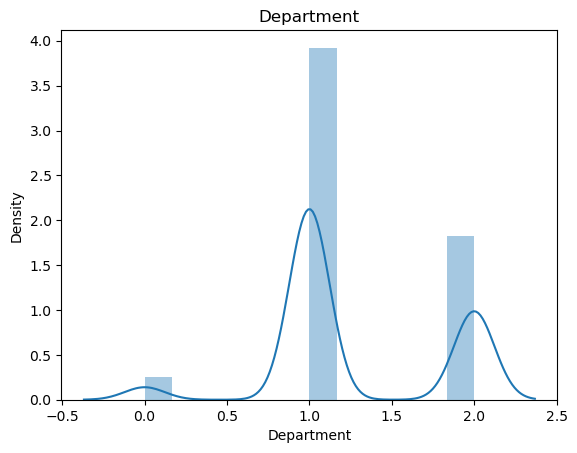

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


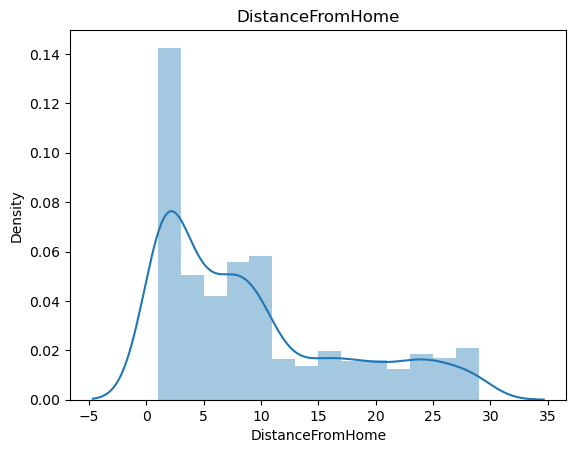

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


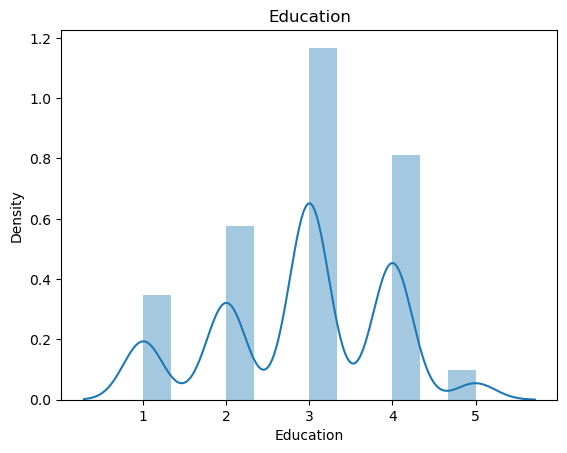

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


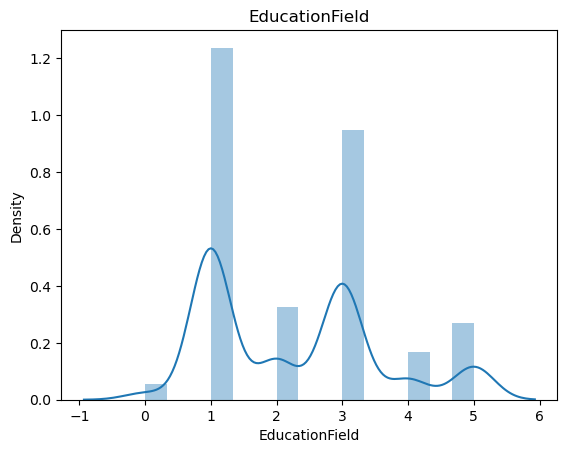

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


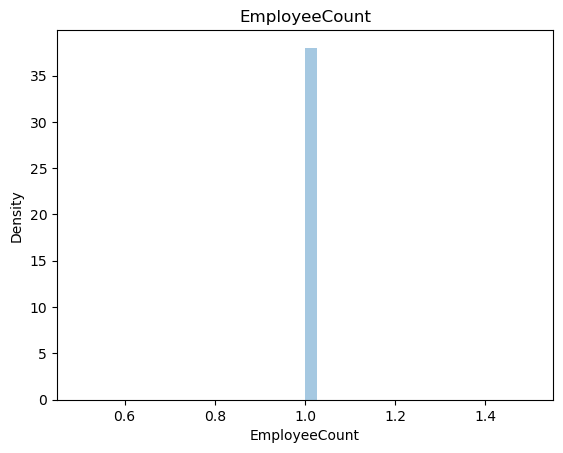

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


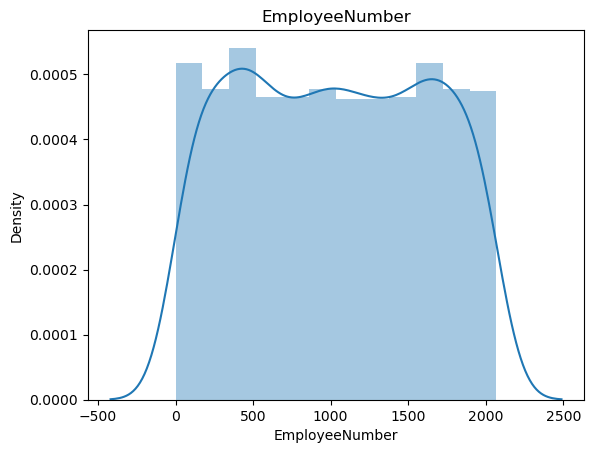

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


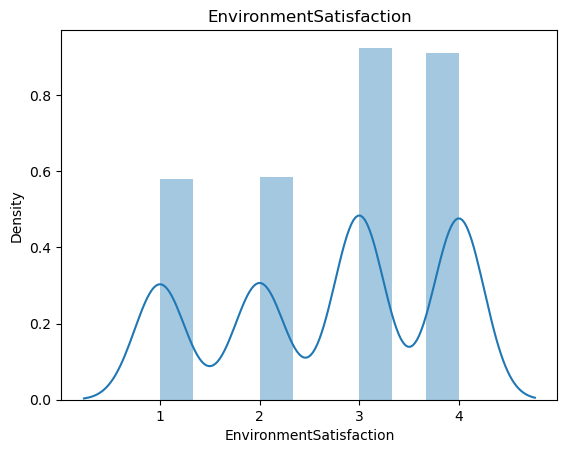

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


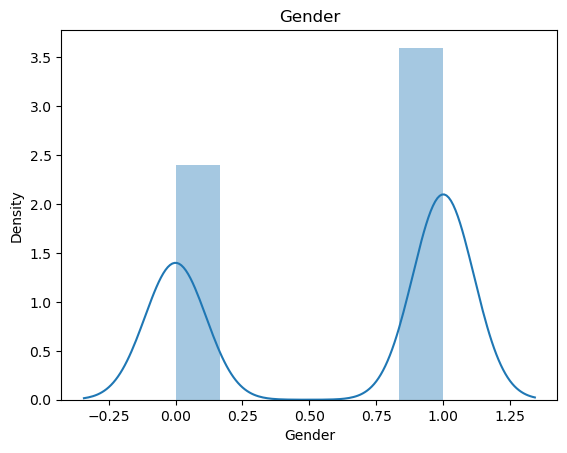

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


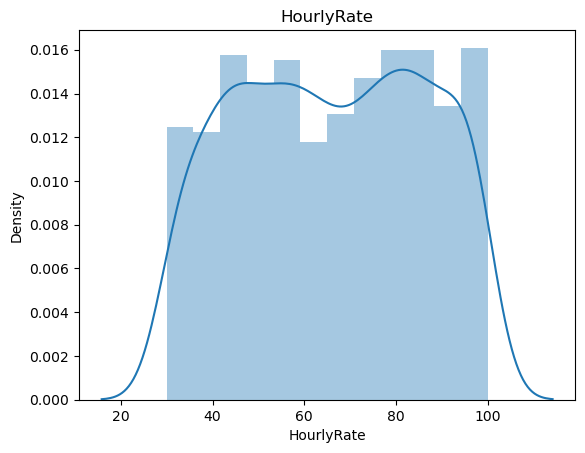

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


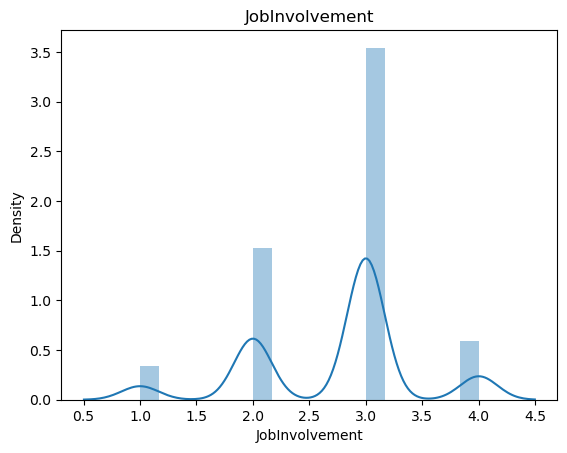

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


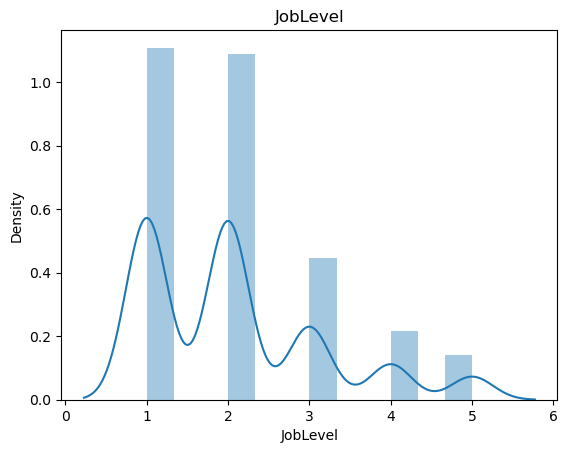

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


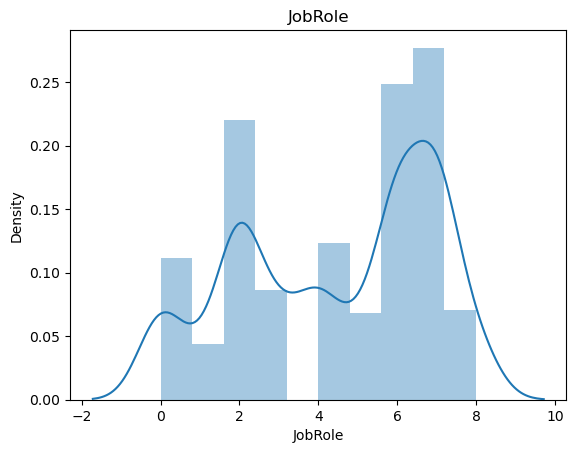

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


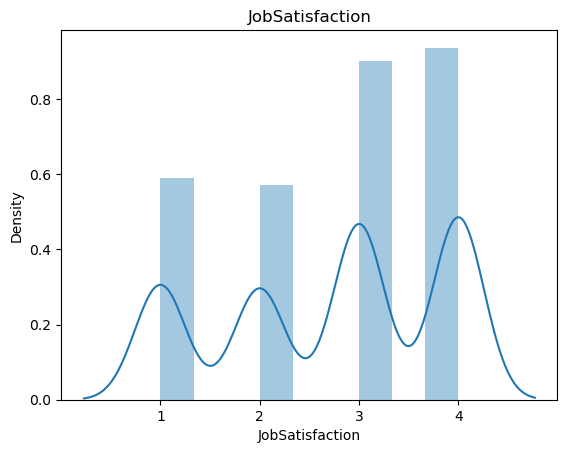

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


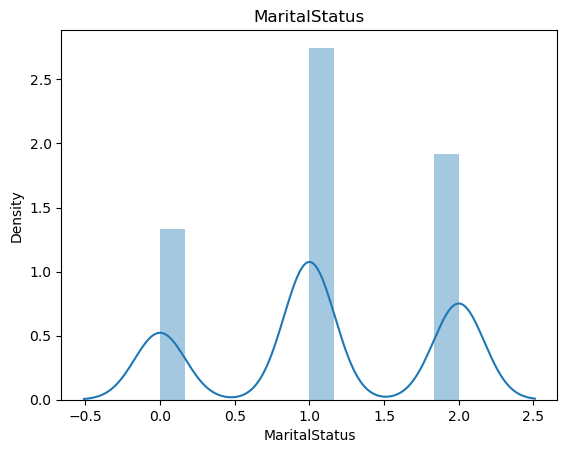

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


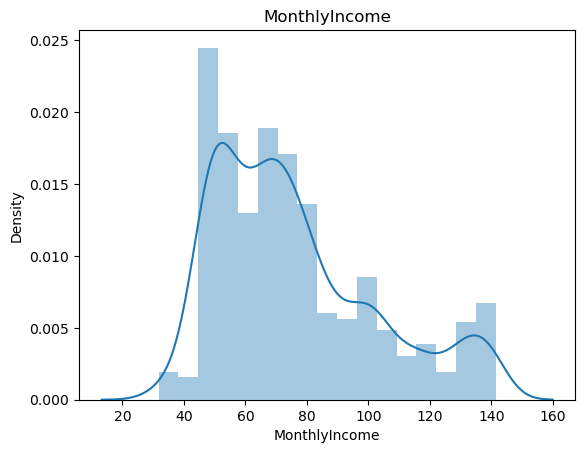

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


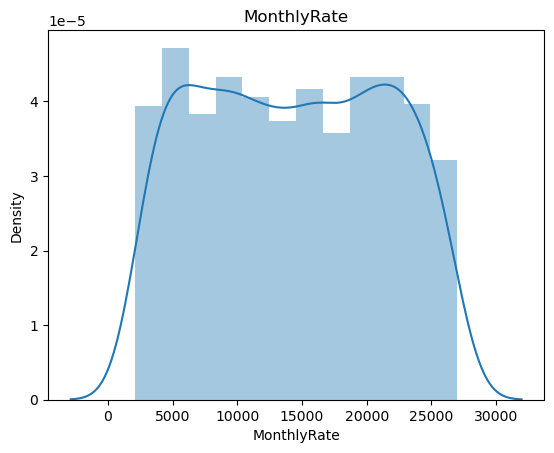

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


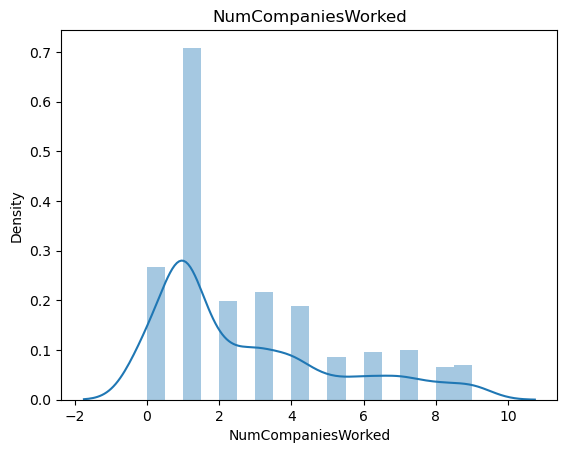

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


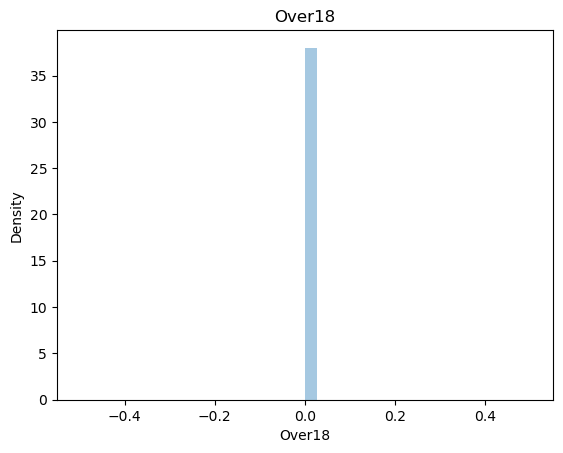

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


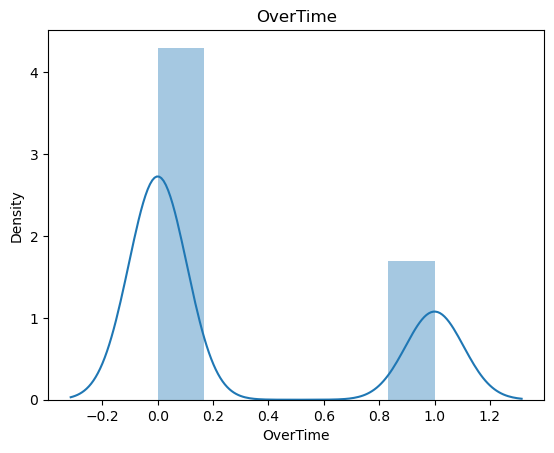

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


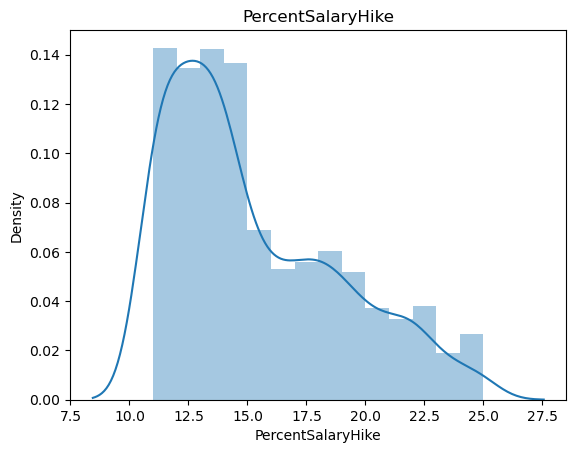

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


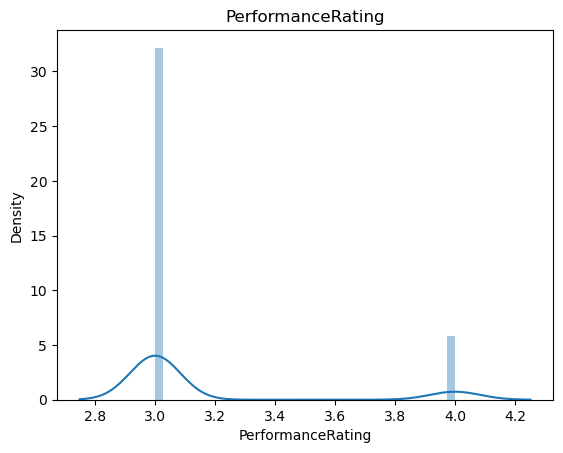

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


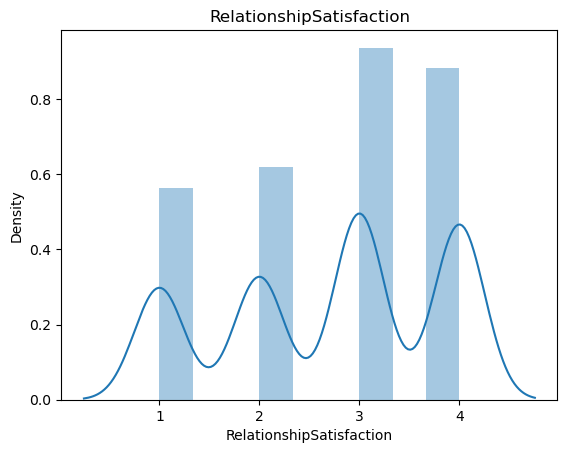

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


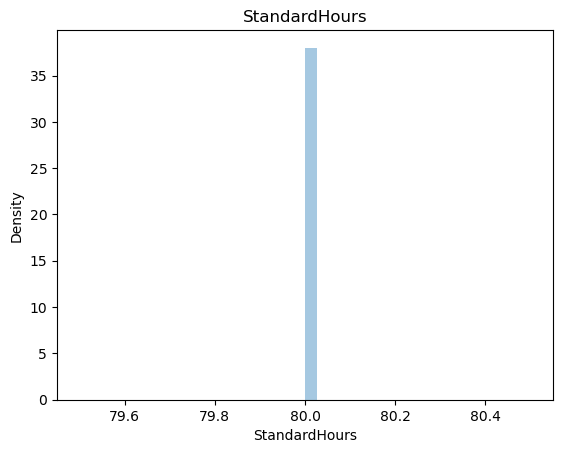

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


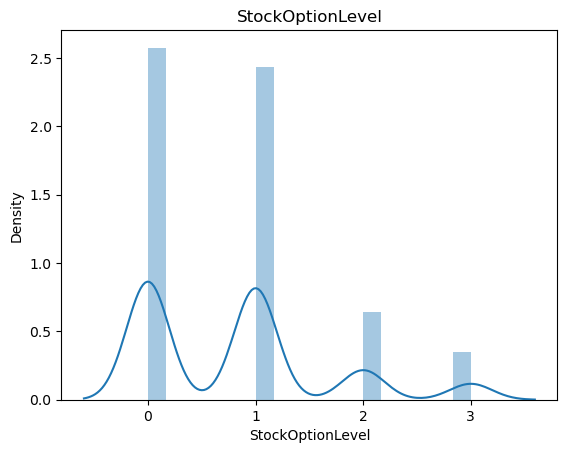

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


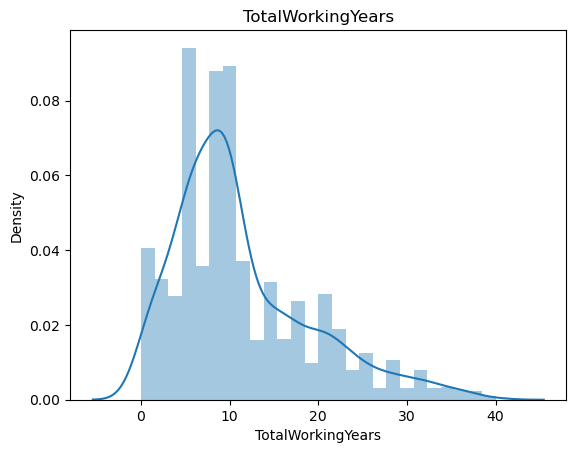

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


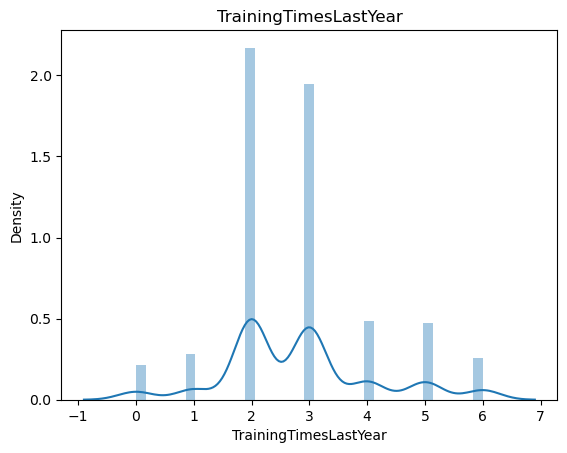

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


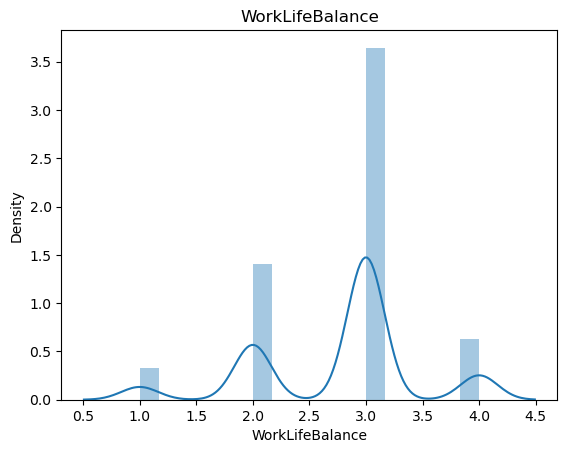

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


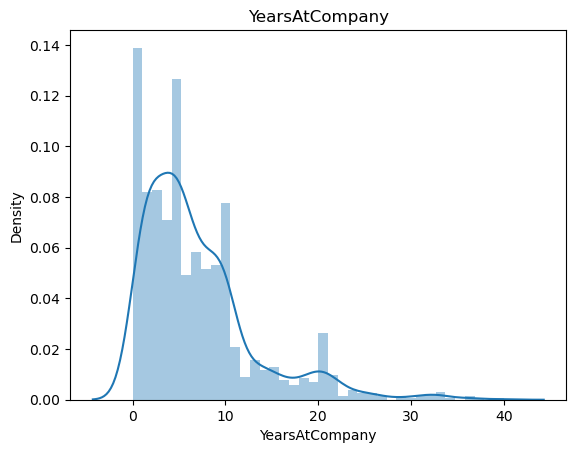

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


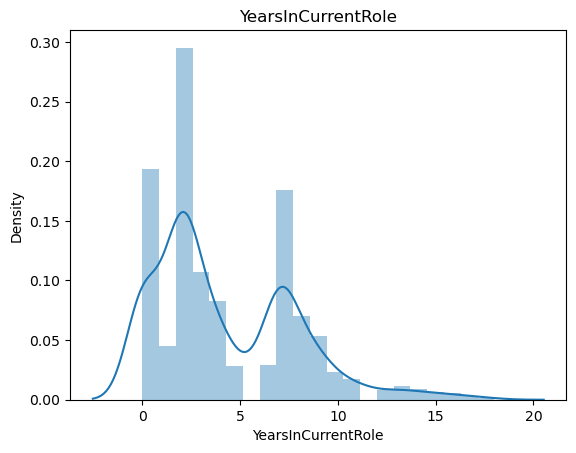

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


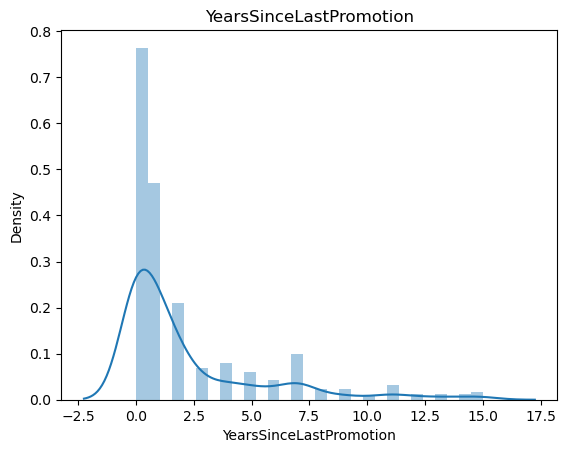

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


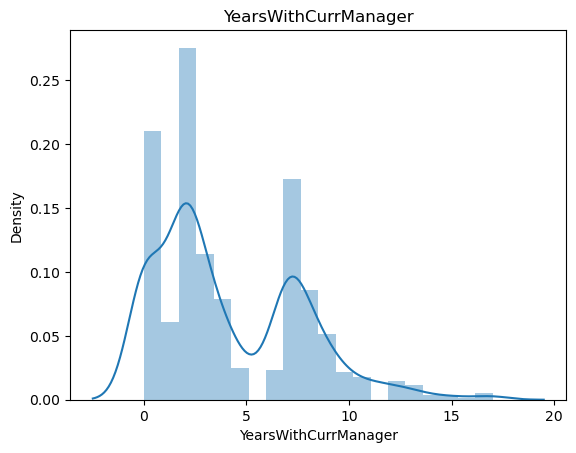

In [19]:
for i in hr.columns:
    sns.distplot(hr[i])
    plt.title(i)
    plt.show()

In many of the columns the skewness can be seen but most of them are categorical data. So skewness can not be removed from them neither outliers can be removed.
This means the data is not balanced hence we will try to balance it instead of removing the skewness or removing outliers.

Separeting the target variables and other variables and them will try to balance the data set.

In [20]:
y = hr.iloc[:,1]

In [21]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [22]:
hr.drop('Attrition', axis = 1, inplace = True)

In [23]:
hr

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,2,3.0,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2.0,613,1.0,6,1,3.0,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2.0,155,1.0,4,3,1.0,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1.0,1023,2.0,2,3,3.0,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [24]:
hr['Attrition'] = y

In [25]:
hr

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2.0,1102,2.0,1,2,1.0,1,1,2,...,80,0,8,0,1,6,4,0,5,1.0
1,49,1.0,279,1.0,8,1,1.0,1,2,3,...,80,1,10,3,3,10,7,1,7,0.0
2,37,2.0,1373,1.0,2,2,4.0,1,4,4,...,80,0,7,3,3,0,0,0,0,1.0
3,33,1.0,1392,1.0,3,4,1.0,1,5,4,...,80,0,8,3,3,8,7,3,0,0.0
4,27,2.0,591,1.0,2,1,3.0,1,7,1,...,80,1,6,3,3,2,2,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,2,3.0,1,2061,3,...,80,1,17,3,3,5,2,0,3,0.0
1466,39,2.0,613,1.0,6,1,3.0,1,2062,4,...,80,1,9,5,3,7,7,1,7,0.0
1467,27,2.0,155,1.0,4,3,1.0,1,2064,2,...,80,1,6,0,3,6,2,0,3,0.0
1468,49,1.0,1023,2.0,2,3,3.0,1,2065,4,...,80,0,17,3,2,9,6,0,8,0.0


In [26]:
x = hr.iloc[:,:-1]

In [27]:
y = hr.iloc[:,-1]

In [28]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,2,3.0,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2.0,613,1.0,6,1,3.0,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2.0,155,1.0,4,3,1.0,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1.0,1023,2.0,2,3,3.0,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [29]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
sm = SMOTE(random_state = 42)

In [32]:
x_resam, y_resam = sm.fit_resample(x,y)

In [33]:
hr_resam = pd.DataFrame(x_resam, columns = x.columns)

In [34]:
hr_resam

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.000000,1102,2.000000,1,2,1.000000,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1.000000,279,1.000000,8,1,1.000000,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2.000000,1373,1.000000,2,2,4.000000,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.000000,1392,1.000000,3,4,1.000000,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2.000000,591,1.000000,2,1,3.000000,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,29,1.328545,367,1.000000,1,2,3.328545,1,1266,3,...,3,80,0,8,2,2,3,2,2,2
2462,33,0.316922,1286,1.683078,18,2,1.683078,1,353,1,...,2,80,0,9,3,2,6,2,1,4
2463,23,1.120731,692,1.879269,8,3,2.120731,1,2023,3,...,1,80,1,1,3,2,1,0,1,0
2464,22,1.741568,324,1.741568,5,1,2.258432,1,1708,2,...,2,80,0,2,2,2,0,0,0,0


In [35]:
hr_resam['Attrition'] = y_resam

In [36]:
hr_resam

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2.000000,1102,2.000000,1,2,1.000000,1,1,2,...,80,0,8,0,1,6,4,0,5,1.0
1,49,1.000000,279,1.000000,8,1,1.000000,1,2,3,...,80,1,10,3,3,10,7,1,7,0.0
2,37,2.000000,1373,1.000000,2,2,4.000000,1,4,4,...,80,0,7,3,3,0,0,0,0,1.0
3,33,1.000000,1392,1.000000,3,4,1.000000,1,5,4,...,80,0,8,3,3,8,7,3,0,0.0
4,27,2.000000,591,1.000000,2,1,3.000000,1,7,1,...,80,1,6,3,3,2,2,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,29,1.328545,367,1.000000,1,2,3.328545,1,1266,3,...,80,0,8,2,2,3,2,2,2,1.0
2462,33,0.316922,1286,1.683078,18,2,1.683078,1,353,1,...,80,0,9,3,2,6,2,1,4,1.0
2463,23,1.120731,692,1.879269,8,3,2.120731,1,2023,3,...,80,1,1,3,2,1,0,1,0,1.0
2464,22,1.741568,324,1.741568,5,1,2.258432,1,1708,2,...,80,0,2,2,2,0,0,0,0,1.0


We have resampled the data and the number of rows have increased as compared to the previous basic data set.

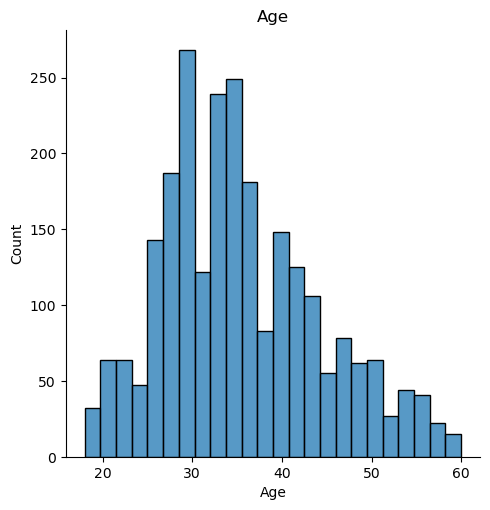

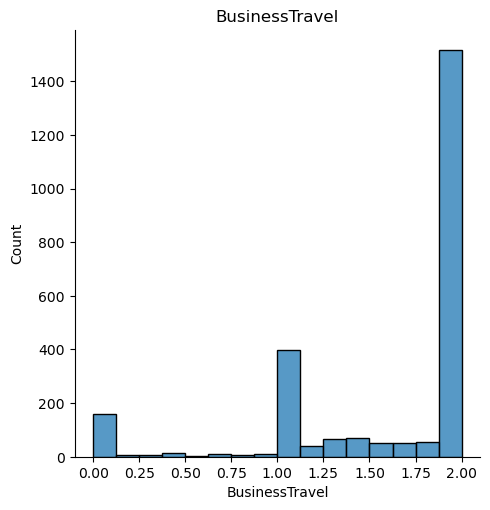

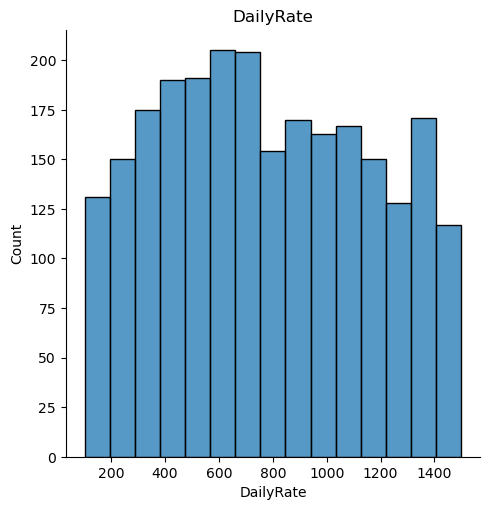

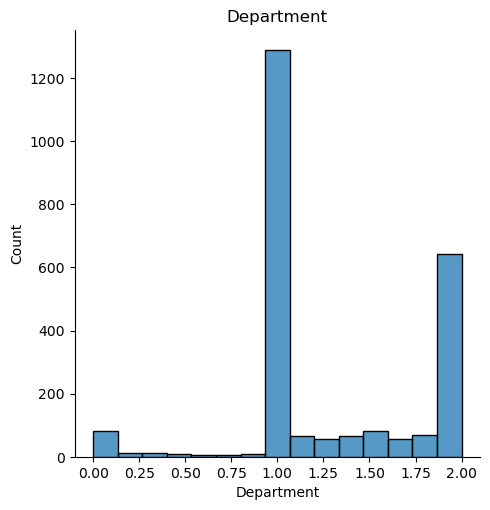

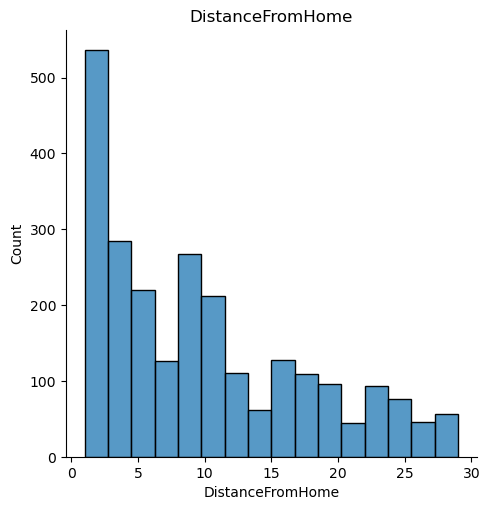

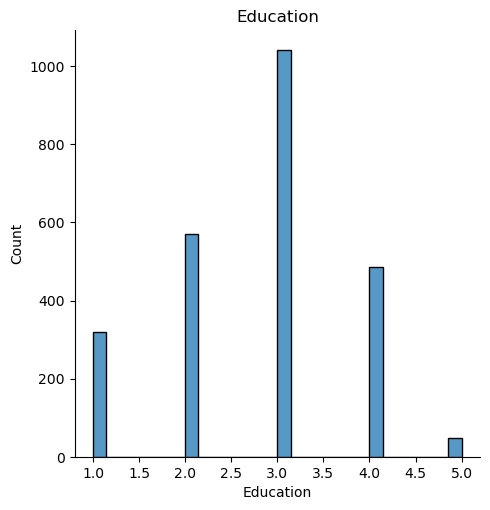

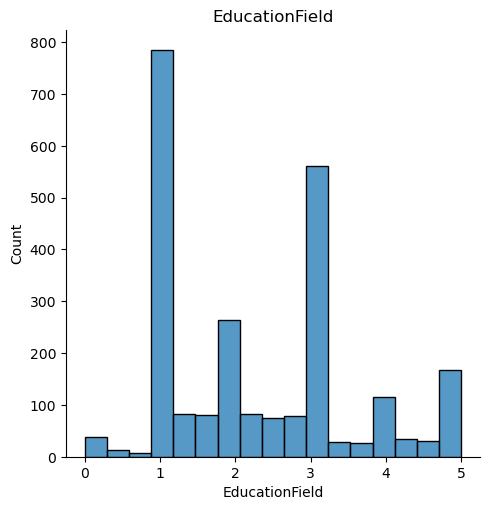

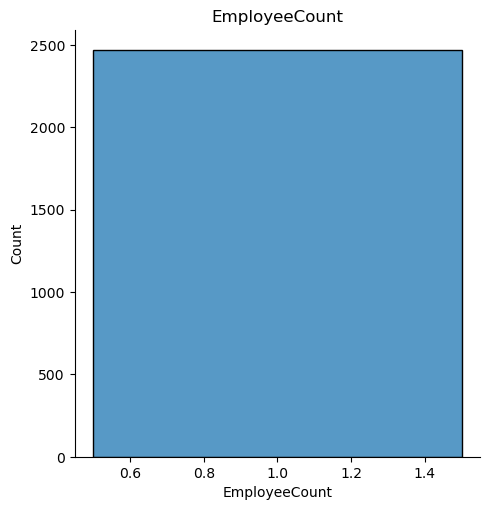

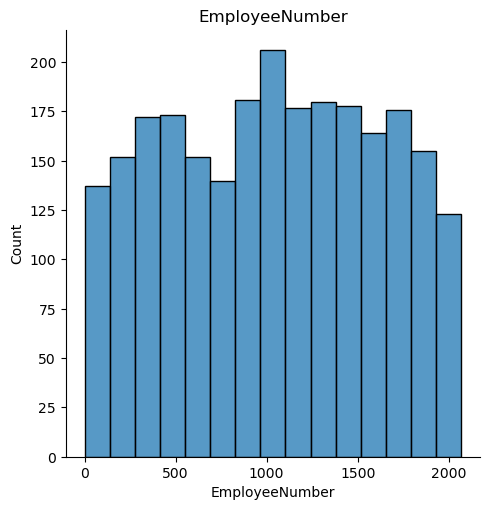

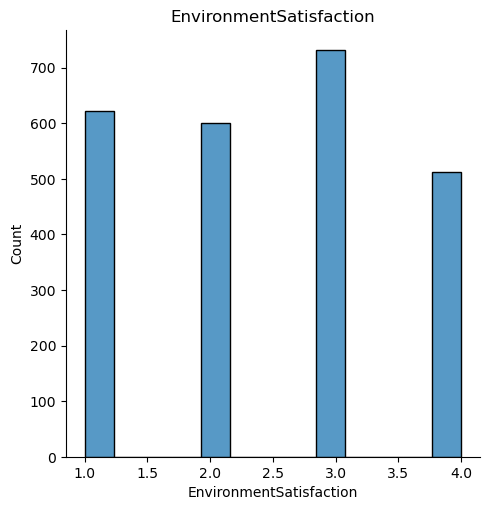

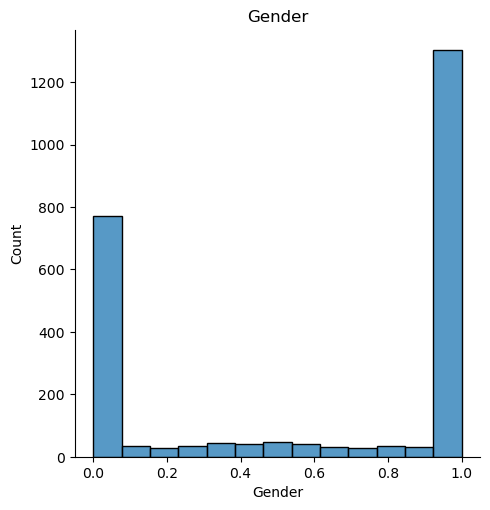

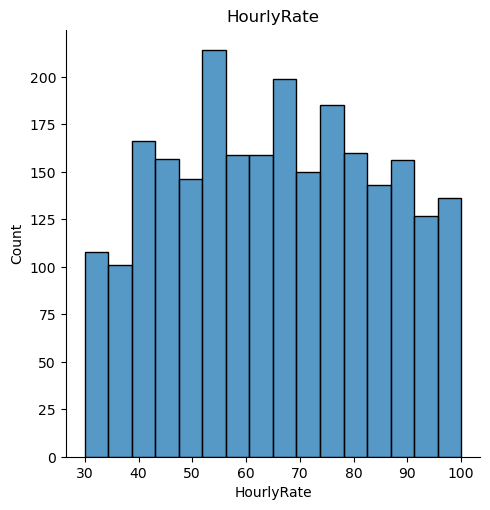

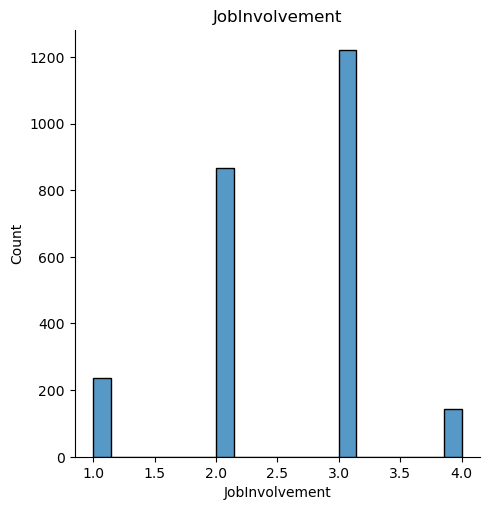

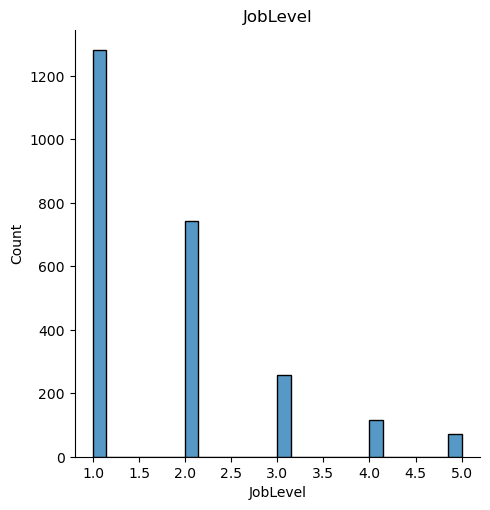

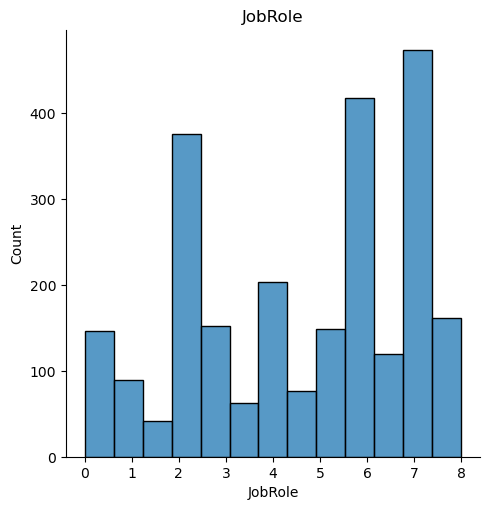

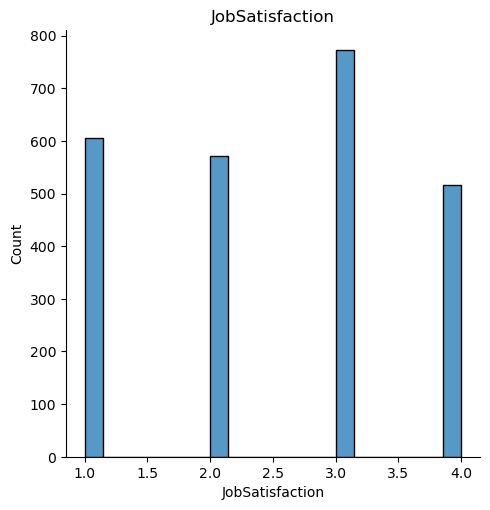

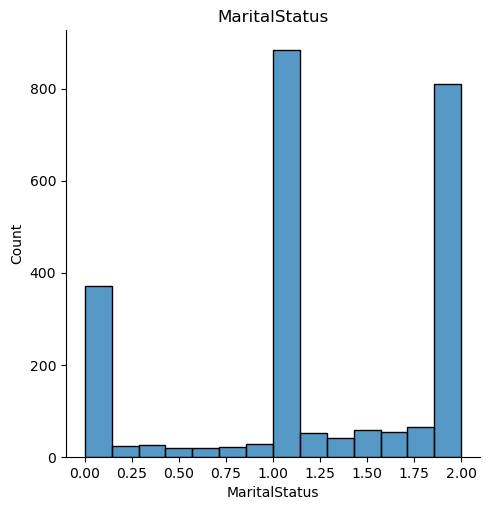

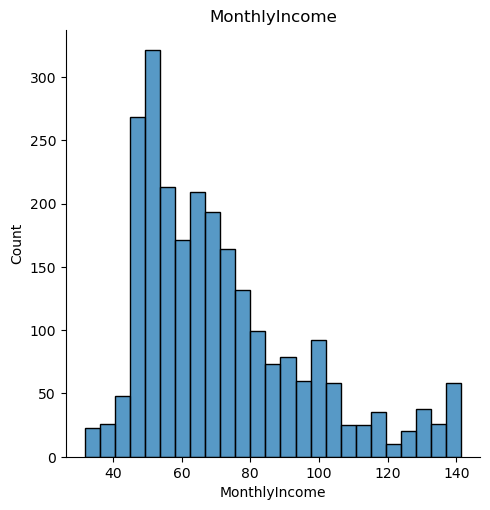

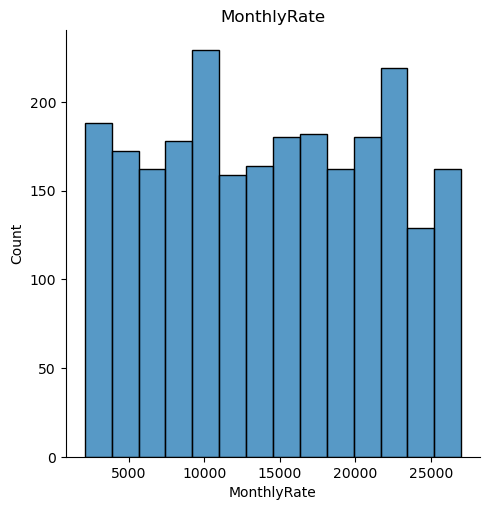

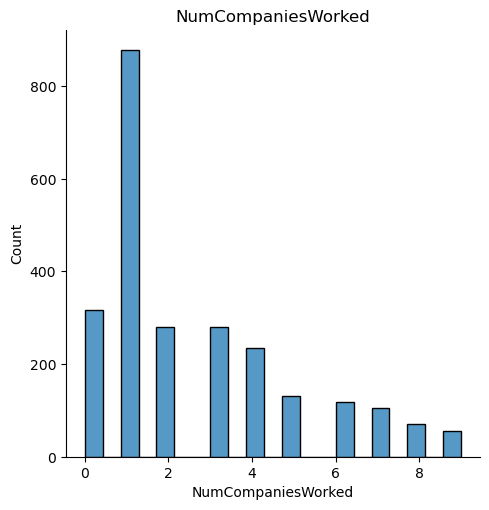

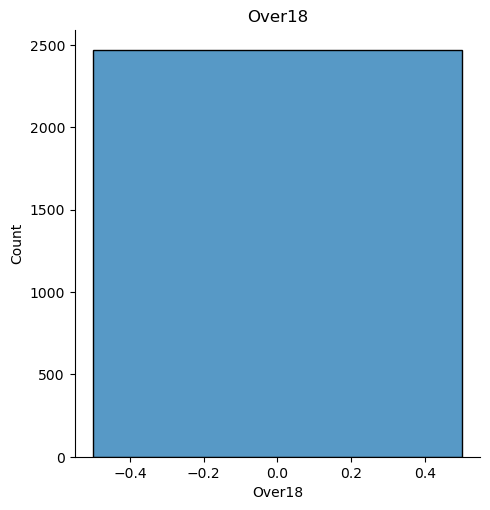

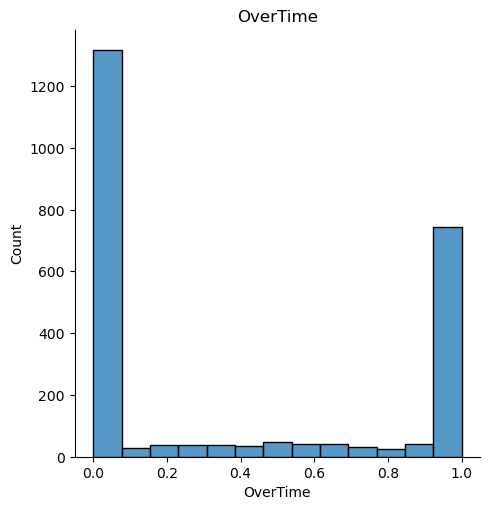

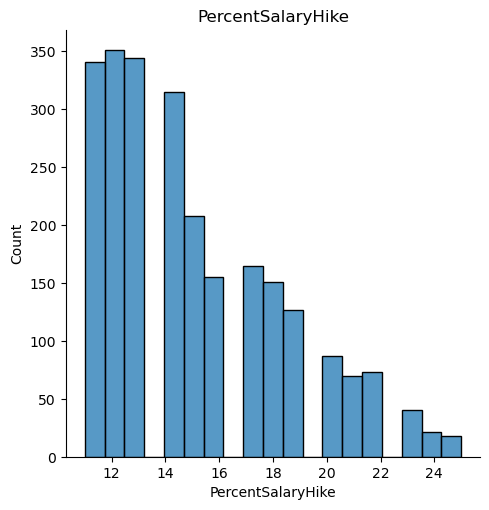

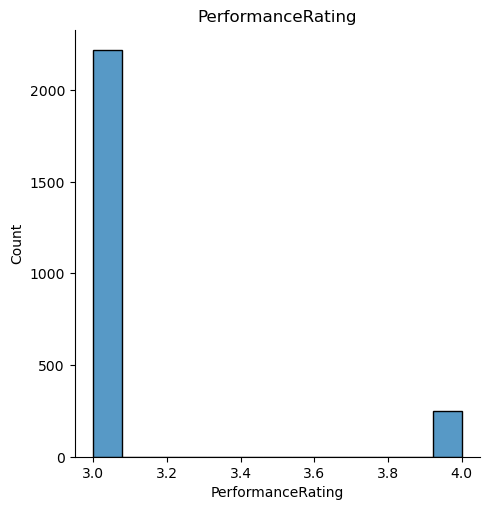

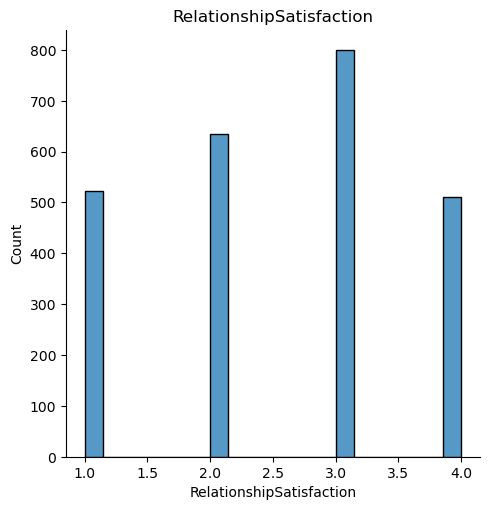

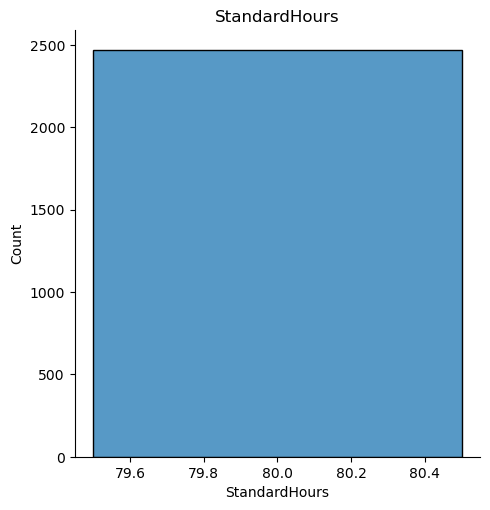

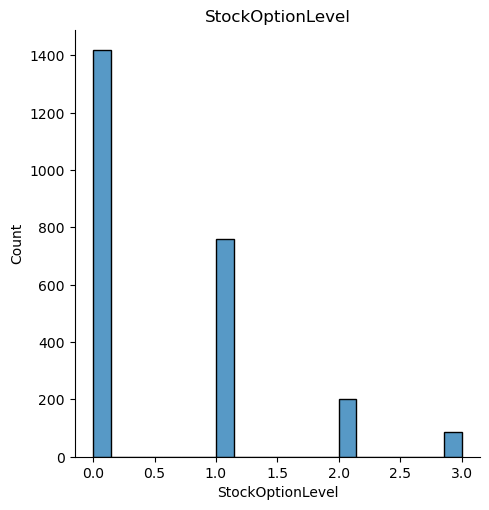

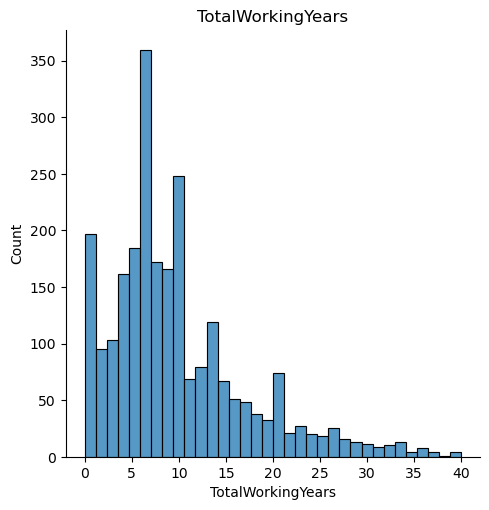

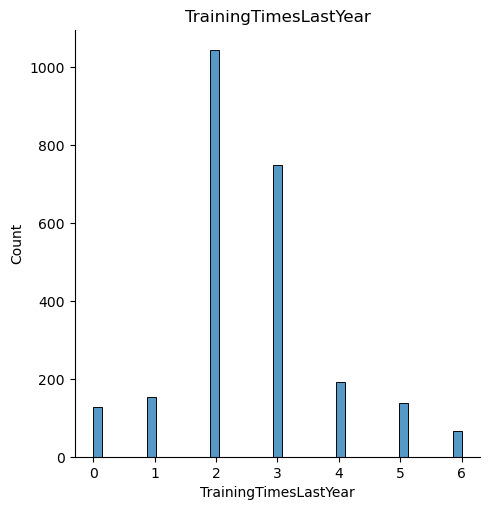

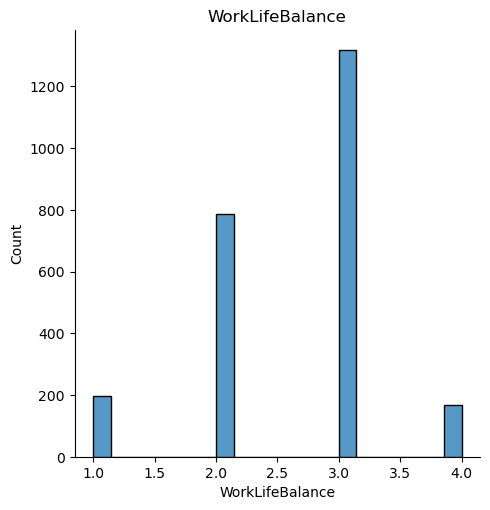

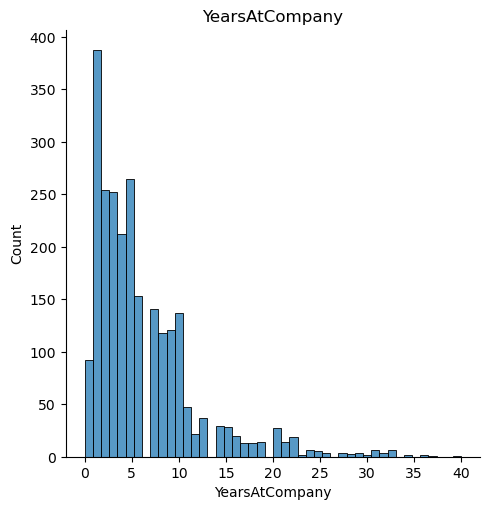

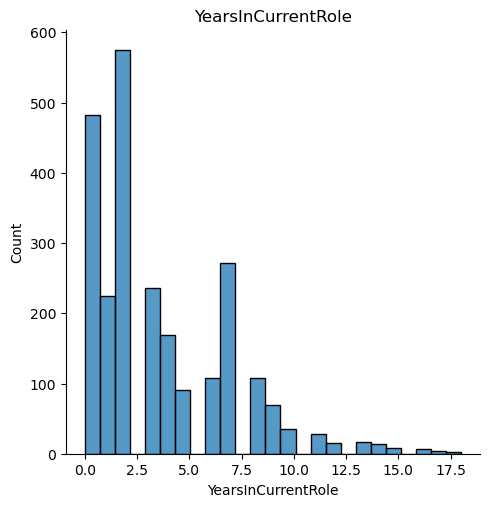

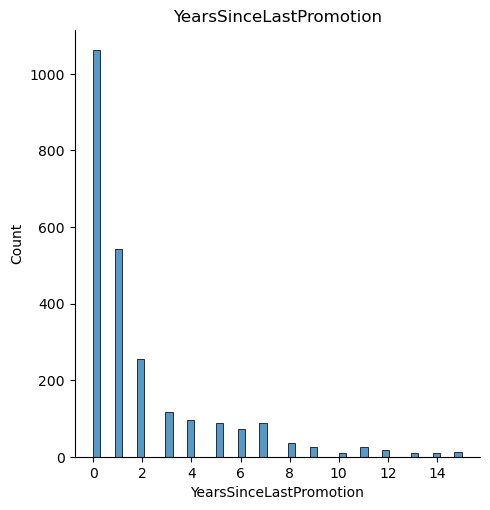

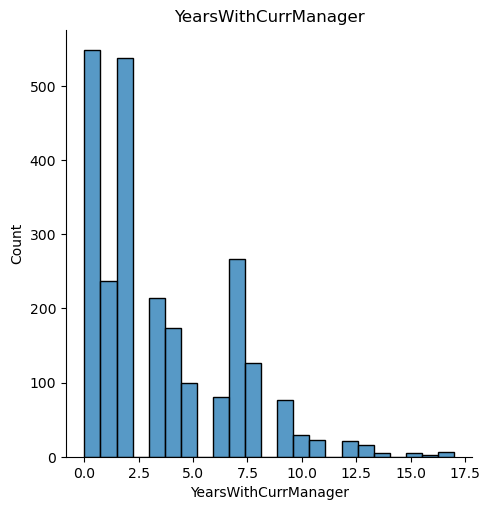

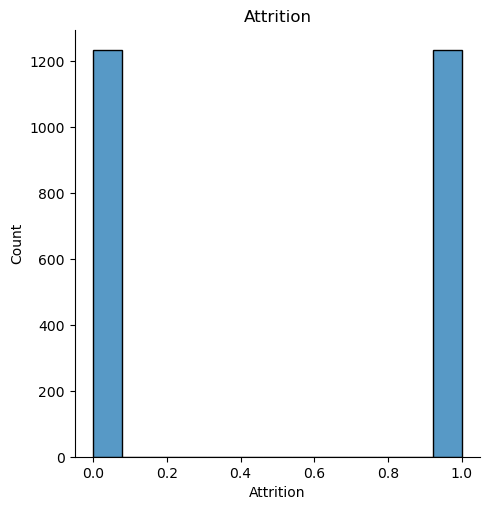

In [37]:
for i in hr_resam.columns:
    sns.displot(hr_resam[i])
    plt.title(i)
    plt.show()

So the balanced data set can be seen in the above displots. We will now try to use PCA technique to reduce the dimentionality of data.

In [38]:
x1 = hr_resam.iloc[:,:-1]

In [39]:
y1 = hr_resam.iloc[:,-1]

In [40]:
x1

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.000000,1102,2.000000,1,2,1.000000,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1.000000,279,1.000000,8,1,1.000000,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2.000000,1373,1.000000,2,2,4.000000,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1.000000,1392,1.000000,3,4,1.000000,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2.000000,591,1.000000,2,1,3.000000,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,29,1.328545,367,1.000000,1,2,3.328545,1,1266,3,...,3,80,0,8,2,2,3,2,2,2
2462,33,0.316922,1286,1.683078,18,2,1.683078,1,353,1,...,2,80,0,9,3,2,6,2,1,4
2463,23,1.120731,692,1.879269,8,3,2.120731,1,2023,3,...,1,80,1,1,3,2,1,0,1,0
2464,22,1.741568,324,1.741568,5,1,2.258432,1,1708,2,...,2,80,0,2,2,2,0,0,0,0


In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components = 12)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()

x2 = pd.DataFrame(sc.fit_transform(x1), columns = x1.columns)
x2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.637113,0.660550,0.839884,1.403081,-1.139940,-0.762092,-1.005136,0.0,-1.808943,-0.425112,...,-1.464079,0.0,-0.734409,-0.252713,-2.106352,-2.168861,-0.016029,0.124267,-0.668183,0.474531
1,1.542918,-1.026971,-1.306506,-0.576064,-0.227798,-1.781798,-1.005136,0.0,-1.807198,0.500154,...,1.414277,0.0,0.540082,0.020736,0.353830,0.559920,0.677429,1.020301,-0.330185,1.083214
2,0.184210,0.660550,1.546654,-0.576064,-1.009634,-0.762092,1.370142,0.0,-1.803708,1.425420,...,-0.504627,0.0,-0.734409,-0.389437,0.353830,0.559920,-1.056216,-1.070444,-0.668183,-1.047176
3,-0.268693,-1.026971,1.596207,-0.576064,-0.879328,1.277321,-1.005136,0.0,-1.801962,1.425420,...,0.454825,0.0,-0.734409,-0.252713,0.353830,0.559920,0.330700,1.020301,0.345810,-1.047176
4,-0.948047,0.660550,-0.492808,-0.576064,-1.009634,-1.781798,0.578383,0.0,-1.798472,-1.350379,...,1.414277,0.0,0.540082,-0.526161,0.353830,0.559920,-0.709487,-0.473088,0.007813,-0.438494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-0.721596,-0.472544,-1.077002,-0.576064,-1.139940,-0.762092,0.838512,0.0,0.398694,0.500154,...,0.454825,0.0,-0.734409,-0.252713,-0.466231,-0.804470,-0.536122,-0.473088,0.007813,-0.438494
2462,-0.268693,-2.179679,1.319758,0.775845,1.075262,-0.762092,-0.464303,0.0,-1.194644,-1.350379,...,-0.504627,0.0,-0.734409,-0.115988,0.353830,-0.804470,-0.016029,-0.473088,-0.330185,0.170189
2463,-1.400950,-0.823234,-0.229399,1.164136,-0.227798,0.257614,-0.117786,0.0,1.719787,0.500154,...,-1.464079,0.0,0.540082,-1.209783,0.353830,-0.804470,-0.882851,-1.070444,-0.330185,-1.047176
2464,-1.514176,0.224441,-1.189146,0.891607,-0.618716,-1.781798,-0.008761,0.0,1.170059,-0.425112,...,-0.504627,0.0,-0.734409,-1.073058,-0.466231,-0.804470,-1.056216,-1.070444,-0.668183,-1.047176


We have standardized the data using standard scaler now we will use PCA technique to reduce the dimentionality of data.

In [45]:
xn = pd.DataFrame(pca.fit_transform(x2))
xn

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.113670,1.571135,-2.451041,-0.846251,1.589677,-0.306651,-0.011938,-2.044674,-0.292502,0.756240,2.923462,0.082142
1,1.435207,-0.297364,3.452877,-0.546343,1.182038,-0.732649,2.293500,-0.529260,0.981217,1.376972,-1.013872,-0.021740
2,-2.192752,-0.878897,-0.632147,0.586068,0.636500,-2.804183,-2.035385,-1.939666,-0.580908,0.415647,0.066590,-0.621190
3,-0.292002,0.197834,-0.413503,-0.100531,-1.293176,-1.296252,1.382478,-1.017684,-0.982562,0.226655,2.605323,0.175103
4,-1.228660,-1.530546,-1.191964,0.403821,-0.281979,-1.773221,0.178400,-1.476405,0.809483,0.096657,-1.353028,1.535711
...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-1.702751,0.441363,-1.072821,1.714851,0.231013,-0.683969,-0.587568,0.015550,-0.300545,-0.660484,-1.856098,0.906629
2462,-1.057858,1.368888,-0.310512,-0.222494,0.667868,0.116599,-0.789271,-1.127145,-1.317109,2.698859,0.352442,0.291683
2463,-2.840653,0.611119,0.643704,-1.622356,-0.822736,1.592670,0.619343,1.231971,0.354141,-1.460278,-1.197408,-0.209311
2464,-3.321319,1.812805,-0.716596,0.450884,-0.294808,0.402957,-0.479883,0.352147,0.782867,-0.832971,-2.007541,0.702741


So we have reduced our data dimentionality in the sata now we will check for variance inflation factor if any.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vari = variance_inflation_factor

In [48]:
var = pd.DataFrame()

var['Values'] = [vari(xn.values,i) for i in range(len(xn.columns))]
var['Names'] = xn.columns

In [49]:
var

,Values,Names
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


So now we will go ahead and implement the various logistic models on the data check how they are working.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [52]:
maxac = 0
maxrs = 0

for i in range(0,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(xn,y1,test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x1_train,y1_train)
    pred = lg.predict(x1_test)
    ac = accuracy_score(y1_test, pred)
    if ac > maxac:
        maxac = ac
        maxrs = i

print('The highest accuracy score is', maxac, 'at random state', maxrs)

The highest accuracy score is 0.8702702702702703 at random state 25


In [74]:
x_train,x_test,y_train,y_test = train_test_split(xn,y1,test_size = 0.30, random_state = 25)

In [75]:
lg = LogisticRegression()

lg.fit(x_train,y_train)
lgpred = lg.predict(x_test)
lgac = accuracy_score(y_test,lgpred)
lgcon = confusion_matrix(y_test, lgpred)
lgclass = classification_report(y_test, lgpred)

print(lgac.round(2))
print(lgcon)
print(lgclass)

0.87
[[325  55]
 [ 41 319]]
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87       380
         1.0       0.85      0.89      0.87       360

    accuracy                           0.87       740
   macro avg       0.87      0.87      0.87       740
weighted avg       0.87      0.87      0.87       740



In [76]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score

In [77]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
rfcpred = rfc.predict(x_test)
rfcac = accuracy_score(y_test,rfcpred)
rfccon = confusion_matrix(y_test, rfcpred)
rfcclass = classification_report(y_test, rfcpred)

print(rfcac.round(2))
print(rfccon)
print(rfcclass)

0.89
[[332  48]
 [ 36 324]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89       380
         1.0       0.87      0.90      0.89       360

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740



In [78]:
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etcpred = etc.predict(x_test)
etcac = accuracy_score(y_test,etcpred)
etccon = confusion_matrix(y_test, etcpred)
etcclass = classification_report(y_test, etcpred)

print(etcac.round(2))
print(etccon)
print(etcclass)

0.91
[[345  35]
 [ 32 328]]
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       380
         1.0       0.90      0.91      0.91       360

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740



In [79]:
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
svcac = accuracy_score(y_test, svcpred)
svccon = confusion_matrix(y_test, svcpred)
svcclass = classification_report(y_test, svcpred)

print(svcac.round(2))
print(svccon)
print(svcclass)

0.89
[[330  50]
 [ 33 327]]
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       380
         1.0       0.87      0.91      0.89       360

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740



In [80]:
gbc=GradientBoostingClassifier()
gbc.fit(x_test,y_test)
gbcpred = gbc.predict(x_test)
gbcac = accuracy_score(y_test, gbcpred)
gbccon = confusion_matrix(y_test, gbcpred)
gbcclass = classification_report(y_test, gbcpred)

print(gbcac.round(2))
print(gbccon)
print(gbcclass)

0.99
[[379   1]
 [  5 355]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       380
         1.0       1.00      0.99      0.99       360

    accuracy                           0.99       740
   macro avg       0.99      0.99      0.99       740
weighted avg       0.99      0.99      0.99       740



In [81]:
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
adcpred = adc.predict(x_test)
adcac = accuracy_score(y_test, adcpred)
adccon = confusion_matrix(y_test, adcpred)
adcclass = classification_report(y_test, adcpred)

print(adcac.round(2))
print(adccon)
print(adcclass)

0.84
[[314  66]
 [ 54 306]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       380
         1.0       0.82      0.85      0.84       360

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740



In [82]:
bc=BaggingClassifier()

bc.fit(x_train,y_train)
bcpred = bc.predict(x_test)
bcac = accuracy_score(y_test, bcpred)
bccon = confusion_matrix(y_test, bcpred)
bcclass = classification_report(y_test, bcpred)

print(bcac.round(2))
print(bccon)
print(bcclass)

0.84
[[321  59]
 [ 57 303]]
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       380
         1.0       0.84      0.84      0.84       360

    accuracy                           0.84       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.84      0.84      0.84       740



After implementing different models on this data set we can see that our highest accuracy can be seen in Gradient Boosting Classifier.
The below table will help in analyzing all the accuracy score's at once.

In [83]:
print('The Accuracy Score for Logistic Regression', lgac.round(2))
print('The Accuracy Score for Random Forest Classifier', rfcac.round(2))
print('The Accuracy Score for Extra Trees Classifier', etcac.round(2))
print('The Accuracy Score for Support Vector Classifier', svcac.round(2))
print('The Accuracy Score for Gradient Boosting Classifier', gbcac.round(2))
print('The Accuracy Score for Ada Boosting Classifier', adcac.round(2))
print('The Accuracy Score for Bagging Classifier', bcac.round(2))

The Accuracy Score for Logistic Regression 0.87
The Accuracy Score for Random Forest Classifier 0.89
The Accuracy Score for Extra Trees Classifier 0.91
The Accuracy Score for Support Vector Classifier 0.89
The Accuracy Score for Gradient Boosting Classifier 0.99
The Accuracy Score for Ada Boosting Classifier 0.84
The Accuracy Score for Bagging Classifier 0.84


So, the Gradient Boosting Classifier is having highest accuracy. We will now check the cross val score for all as well.

In [84]:
s = cross_val_score(lg,xn,y1)
print(s)
print(s.mean())
print(lgac.round(2))

print('The difference between accuracy score and cross val score of Logsitic Regression', lgac - s.mean())

[0.70647773 0.85598377 0.86409736 0.85395538 0.83975659]
0.8240541672483597
0.87
The difference between accuracy score and cross val score of Logsitic Regression 0.04621610302191059


In [85]:
s1 = cross_val_score(rfc,xn,y1)
print(s1)
print(s1.mean())
print(rfcac.round(2))

print('The difference between accuracy score and cross val score of Random Forest Classifier', rfcac - s1.mean())

[0.72469636 0.90263692 0.89452333 0.89655172 0.88032454]
0.8597465734862981
0.89
The difference between accuracy score and cross val score of Random Forest Classifier 0.02673991300018841


In [86]:
s2 = cross_val_score(etc,xn,y1)
print(s2)
print(s2.mean())
print(etcac.round(2))

print('The difference between accuracy score and cross val score of Extra Trees Classifier', etcac - s2.mean())

[0.75506073 0.92292089 0.91075051 0.9188641  0.88640974]
0.878801192402132
0.91
The difference between accuracy score and cross val score of Extra Trees Classifier 0.03065826705732755


In [87]:
s3 = cross_val_score(svc,xn,y1)
print(s3)
print(s3.mean())
print(svcac.round(2))

print('The difference between accuracy score and cross val score of Support Vector Classifier', svcac - s3.mean())

[0.69635628 0.89452333 0.90060852 0.89452333 0.86004057]
0.849210403133751
0.89
The difference between accuracy score and cross val score of Support Vector Classifier 0.038627434704086916


In [88]:
s4 = cross_val_score(gbc,xn,y1)
print(s4)
print(s4.mean())
print(gbcac.round(2))

print('The difference between accuracy score and cross val score of Gradient Boosting Classifier', gbcac - s4.mean())

[0.6902834  0.86409736 0.87221095 0.86612576 0.84178499]
0.8269004935493672
0.99
The difference between accuracy score and cross val score of Gradient Boosting Classifier 0.16499139834252463


In [89]:
s5 = cross_val_score(adc,xn,y1)
print(s5)
print(s5.mean())
print(adcac.round(2))

print('The difference between accuracy score and cross val score of Ada Boost Classifier', adcac - s5.mean())

[0.65991903 0.81541582 0.83772819 0.84381339 0.81947262]
0.7952698097248113
0.84
The difference between accuracy score and cross val score of Ada Boost Classifier 0.04256802811302651


In [90]:
s6 = cross_val_score(bc,xn,y1)
print(s6)
print(s6.mean())
print(bcac.round(2))

print('The difference between accuracy score and cross val score of Bagging Classifier', bcac -s6.mean())

[0.68825911 0.86612576 0.86206897 0.87829615 0.84178499]
0.8273069942761413
0.84
The difference between accuracy score and cross val score of Bagging Classifier 0.015936248967101996


So After checking the cross val score of all models, all of them seems to be good and hence we will go ahead with model who gives us the highest accuracy - Gradient Boosting Classifier.

Implementing the GridSearch CV on our best model.

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {
    'n_estimators': [50, 100, 150],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 4, 5]}

In [93]:
gcv = GridSearchCV(GradientBoostingClassifier(), param_grid)

In [94]:
gcv.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]})

In [95]:
gcv.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}

In [106]:
fm = GradientBoostingClassifier(learning_rate = 0.02, max_depth = 5, n_estimators = 150)

In [107]:
fm.fit(x_train,y_train)
fmpred = fm.predict(x_test)
fmac = accuracy_score(y_test,fmpred)
fmcon = confusion_matrix(y_test, fmpred)
fmclass = classification_report(y_test, fmpred)

print(fmac.round(2))
print(fmcon)
print(fmclass)

0.86
[[319  61]
 [ 46 314]]
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86       380
         1.0       0.84      0.87      0.85       360

    accuracy                           0.86       740
   macro avg       0.86      0.86      0.86       740
weighted avg       0.86      0.86      0.86       740



It seems after implementing GridSearch CV the Gradeint Boosting CLassifier is not working properly. We will also check it on 2nd best as per cross val score - ExtraTrees Classifier.

In [98]:
parameters = {'n_estimators': [100, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2', None]}

In [99]:
gcv1 = GridSearchCV(ExtraTreesClassifier(), parameters, cv =5)

In [100]:
gcv1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [101]:
gcv1.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 300}

In [104]:
fm1 = ExtraTreesClassifier(criterion = 'entropy', max_features = 'auto',  n_estimators = 300)

In [105]:
fm1.fit(x_train,y_train)
fm1pred = fm1.predict(x_test)
fm1ac = accuracy_score(y_test, fm1pred)
fm1con = confusion_matrix(y_test, fm1pred)
fm1class = classification_report(y_test, fm1pred)

print(fm1ac.round(2))
print(fm1con)
print(fm1class)

0.9
[[338  42]
 [ 32 328]]
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       380
         1.0       0.89      0.91      0.90       360

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



So after implementing the GridSearchCV we are having 90% accuracy on model of Extratrees classifier which is better then Gradient Boosting Classifier hence we will go ahead an save it.

In [108]:
import joblib

In [109]:
joblib.dump(fm1,'Hr Attrition')

['Hr Attrition']

In [111]:
model = joblib.load('Hr Attrition')

In [112]:
predi = model.predict(x_test)

In [113]:
A = np.array(y_test)

In [127]:
predi = np.array(predi)

In [128]:
df = pd.DataFrame()

df['Predicted '] = predi
df['Original'] = A

df

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
735,1.0,1.0
736,0.0,0.0
737,0.0,0.0
738,1.0,1.0


In [129]:
df.columns

Index(['Predicted ', 'Original'], dtype='object')

In [130]:
df['Predicted ']

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
735    1.0
736    0.0
737    0.0
738    1.0
739    0.0
Name: Predicted , Length: 740, dtype: float64

In [126]:
df['Original']

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
735    1.0
736    0.0
737    0.0
738    1.0
739    0.0
Name: Original, Length: 740, dtype: float64

In [131]:
df['Predicted '].replace(0,'No', inplace = True)
df['Predicted '].replace(1,'Yes',inplace = True)

df['Original'].replace(0,'No', inplace = True)
df['Original'].replace(1,'Yes', inplace = True)

In [132]:
df

,Predicted,Original
0,Yes,Yes
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
735,Yes,Yes
736,No,No
737,No,No
738,Yes,Yes


So we have Predicted the Attrition Rate from the data set and it can be seen that most of the values are predicted correctly hence it can be said that the model is learning well as well as predicting the values well.

In [137]:
df.head(50)

,Predicted,Original
0,Yes,Yes
1,No,No
2,No,No
3,No,No
4,No,No
5,No,No
6,Yes,Yes
7,Yes,Yes
8,No,No
9,No,No
